In [1]:
# These two lines allow for the notebook to automatically update to use the most
# up-to-date versions of the code being imported
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from pyphotonicsims.components.elements import *

# plt.style.available
%matplotlib inline
plt.style.use('science')
plt.rcParams['figure.figsize'] = [4,3]

## Directional coupler
 - Coupling power
 $$\kappa = \sin{\frac{\pi \delta n L_c}{\lambda}}$$
 - Coupling rate for resonator
 $$\gamma_{ex} = \frac{c\log{1/(1-\kappa^2)}}{n_g L}$$

(0.0, 5.0)

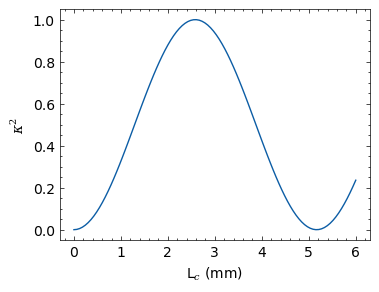

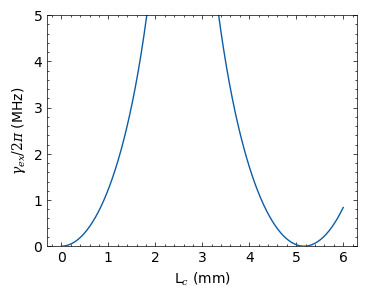

In [2]:
dn = 0.0003
L = 10
ng = 1.53
wl = 1550e-9
Lc = np.linspace(0, 6e-3, 100)
ka2 = directional_coupler(dn, Lc, wl)
r_ex = cavity_coupling_rate(ka2, ng, L)/(2*np.pi*1e6)

plt.figure()
plt.plot(Lc*1e3, ka2)
plt.xlabel(r'L$_c$ (mm)')
plt.ylabel(r'$\kappa^2$')

plt.figure()
plt.plot(Lc*1e3, r_ex)
plt.xlabel(r'L$_c$ (mm)')
plt.ylabel(r'$\gamma_{ex}/2\pi$ (MHz)')
plt.ylim((0, 5))